A partir del archivo Euro_2012_stats_TEAM, se pide:

1. Obtener la matriz de correlación. ¿Qué columnas están mejor correlacionadas?

2. ¿Existe algún tipo de relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles? Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos. Por cada porcentaje de acierto de cara a puerta, ¿cuánto aumenta o disminuye el número de goles? 

3. Si tratamos la columna Goals como una columna categórica y usando logistic regression, SVM y Random forest, ¿cuántos goles marcaría un equipo que tiene...? (por cada algoritmo):

    - % de goles por disparo: 40%
    - Total shots (inc. Blocked): 102
    - Corners Taken: 5
    - Passes: 82
    - Dribbles: 23

In [24]:
import pandas as pd
df = pd.read_csv("../data/Euro_2012_stats_TEAM.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Team                        16 non-null     object 
 1   Goals                       16 non-null     int64  
 2   Shots on target             16 non-null     int64  
 3   Shots off target            16 non-null     int64  
 4   Shooting Accuracy           16 non-null     object 
 5   % Goals-to-shots            16 non-null     object 
 6   Total shots (inc. Blocked)  16 non-null     int64  
 7   Hit Woodwork                16 non-null     int64  
 8   Penalty goals               16 non-null     int64  
 9   Penalties not scored        16 non-null     int64  
 10  Headed goals                16 non-null     int64  
 11  Passes                      16 non-null     int64  
 12  Passes completed            16 non-null     int64  
 13  Passing Accuracy            16 non-nu

In [3]:
df.corr()

,Goals,Shots on target,Shots off target,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,Passes,Passes completed,...,Goals conceded,Saves made,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
Goals,1.000000,0.804193,0.403821,0.650109,0.200512,0.730437,0.023094,0.349330,0.838497,0.830062,...,-0.337689,0.143912,0.663876,0.483833,0.703043,0.337709,-3.580574e-01,0.727830,0.727830,0.136067
Shots on target,0.804193,1.000000,0.611185,0.886090,0.212932,0.478610,-0.229945,0.210571,0.930337,0.923242,...,-0.214415,0.085059,0.765949,0.658353,0.696263,0.544307,-3.340500e-01,0.821342,0.821342,0.249516
Shots off target,0.403821,0.611185,1.000000,0.887032,0.581655,0.126783,-0.173221,0.002284,0.624451,0.612998,...,-0.139274,0.086157,0.615058,0.434815,0.344626,0.534186,-3.377661e-01,0.544974,0.544974,0.045973
Total shots (inc. Blocked),0.650109,0.886090,0.887032,1.000000,0.400121,0.299397,-0.234668,0.125738,0.875698,0.864279,...,-0.184740,0.148269,0.766215,0.623288,0.589635,0.622268,-3.604662e-01,0.763336,0.763336,0.157812
Hit Woodwork,0.200512,0.212932,0.581655,0.400121,1.000000,-0.076923,-0.041345,0.020174,0.095882,0.073814,...,0.062541,-0.230524,0.141180,0.303987,0.113657,0.319708,-2.820513e-01,0.204511,0.204511,-0.189466
Penalty goals,0.730437,0.478610,0.126783,0.299397,-0.076923,1.000000,0.537484,-0.020174,0.545294,0.550720,...,-0.020847,0.058761,0.528185,0.114404,0.627220,0.085467,1.794872e-01,0.531727,0.531727,0.351866
Penalties not scored,0.023094,-0.229945,-0.173221,-0.234668,-0.041345,0.537484,1.000000,-0.357830,-0.169613,-0.179278,...,0.302532,0.051019,0.163643,-0.107169,0.210417,0.127603,5.374838e-01,0.084796,0.084796,0.480079
Headed goals,0.349330,0.210571,0.002284,0.125738,0.020174,-0.020174,-0.357830,1.000000,0.213073,0.200605,...,-0.344447,0.458773,0.157215,0.117445,0.188786,0.067245,-3.429623e-01,0.216077,0.216077,-0.447214
Passes,0.838497,0.930337,0.624451,0.875698,0.095882,0.545294,-0.169613,0.213073,1.000000,0.997697,...,-0.284982,0.207240,0.773382,0.549248,0.731938,0.465799,-4.002506e-01,0.800546,0.800546,0.232214
Passes completed,0.830062,0.923242,0.612998,0.864279,0.073814,0.550720,-0.179278,0.200605,0.997697,1.000000,...,-0.300837,0.184878,0.738845,0.499351,0.704802,0.420410,-4.062897e-01,0.766326,0.766326,0.213345


<AxesSubplot:>

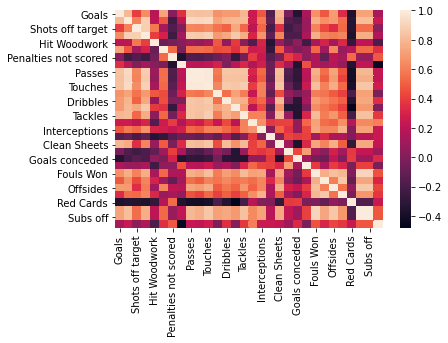

In [2]:
import seaborn as sns 
sns.heatmap( df.corr())

In [8]:
# importat plotly y hacer un scatter plot entre Shooting Accuracy y Goals
import plotly.express as px

fig = px.scatter(df, x="Shooting Accuracy", y="Goals")
fig.show()

In [9]:
fig = px.line(df, x="Shooting Accuracy", y="Goals")
fig.show()

In [38]:
# Hacer regresion lineal
# Formula del 5
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import numpy as np 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [25]:
def p2f(x):
    return float(x.strip('%'))/100
df["Shooting Accuracy"] = df["Shooting Accuracy"].apply(p2f)
df["Shooting Accuracy"] = df["Shooting Accuracy"]*100

In [33]:
X = np.array(df[["Shooting Accuracy", "Shots on target"]])
y = np.array(df["Goals"])
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model_trained = model.fit(X_train, y_train)
accuracy = model_trained.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: -1.5453033713476878


In [ ]:
#Hacer regresion no lineal 
# Fromula del 5 

In [42]:

# Min and max degree of polynomials features to consider
degree_min = 2
degree_max = 8
# Make a pipeline model with polynomial transformation and LASSO regression with cross-validation, run it for increasing degree of polynomial (complexity of the model)
scores = []
for degree in range(degree_min,degree_max+1):
    print("################")
    polinominal_model = PolynomialFeatures(degree) 
    X_poly = polinominal_model.fit_transform(X_train ,y_train)

    #######
    
    print(X_poly.shape)

    lin_reg_model = LinearRegression()
    lin_reg_model.fit(X_poly, y_train)
    y_pred = lin_reg_model.predict(X_poly)
    accuracy = model_trained.score(X_test, y_test)
    

    print("y_pred", y_pred.shape)
    print('Accuracy:', accuracy)
    print('RMSE:', mean_squared_error(y_train, y_pred, squared=False))


################
(12, 6)
y_pred (12,)
Accuracy: -1.5453033713476878
RMSE: 1.1588933012135938
################
(12, 10)
y_pred (12,)
Accuracy: -1.5453033713476878
RMSE: 0.7689162413133518
################
(12, 15)
y_pred (12,)
Accuracy: -1.5453033713476878
RMSE: 1.494514395421886e-11
################
(12, 21)
y_pred (12,)
Accuracy: -1.5453033713476878
RMSE: 7.1994101491507e-11
################
(12, 28)
y_pred (12,)
Accuracy: -1.5453033713476878
RMSE: 3.8581615350244304e-11
################
(12, 36)
y_pred (12,)
Accuracy: -1.5453033713476878
RMSE: 3.2442651054434776e-10
################
(12, 45)
y_pred (12,)
Accuracy: -1.5453033713476878
RMSE: 6.834569952889903e-11


In [53]:
# Tratar goles como categoria:
# Hacer Ramndom Forest, y S
from numpy import mean
from numpy import std
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold
from sklearn.model_selection import cross_val_score

In [54]:
model_batches = RandomForestClassifier()
# evaluate the model

cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=2)
n_scores = cross_val_score(model_batches, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.361 (0.178)


In [56]:
from sklearn import svm

In [57]:
C = 1
clf = svm.LinearSVC(C=C)
clf.fit(X, y)
print ('score:', clf.score(X, y))

score: 0.3125
